In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

from scipy.stats import chi2_contingency
import missingno as msno
pd.set_option('display.max_columns', None)

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

from pycaret.classification import *

In [25]:
url = "https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/EBAC/credito.csv"
df = pd.read_csv('DataFrame_Crédito.csv').drop(columns=['Unnamed: 0', 'id'])
df.head()

,idade,sexo,dependentes,escolaridade,estado_civil,grupo_etario,idade_faixa,idade_estado_civil,escolaridade_renda,salario_anual,limite_credito,renda_alta,meses_de_relacionamento,interacoes_12m,meses_inativo_12m,valor_transacoes_12m,qtd_transacoes_12m,transacoes_por_mes,meses_ativos_12m,tipo_cartao,taxa_utilizacao_credito,valor_medio_transacao,frequencia_interacao,qtd_produtos,default
0,45,M,3,ensino medio,casado,Adulto,38-45,45 - casado,ensino medio - $60K - $80K,$60K - $80K,12691.51,0,39,3,1,1144.90,42,3.500000,11,blue,0.090210,27.259524,0.272727,5,0
1,49,F,5,mestrado,solteiro,Adulto,46-51,49 - solteiro,mestrado - menos que $40K,menos que $40K,8256.96,0,44,2,1,1291.45,33,2.750000,11,blue,0.156407,39.134848,0.181818,6,0
2,51,M,3,mestrado,casado,Adulto,46-51,51 - casado,mestrado - $80K - $120K,$80K - $120K,3418.56,1,36,0,1,1887.72,20,1.666667,11,blue,0.552197,94.386000,0.000000,4,0
3,40,M,3,sem educacao formal,casado,Adulto,38-45,40 - casado,sem educacao formal - $60K - $80K,$60K - $80K,4716.22,0,21,0,1,816.08,28,2.333333,11,blue,0.173037,29.145714,0.000000,5,0
4,44,M,2,mestrado,casado,Adulto,38-45,44 - casado,mestrado - $40K - $60K,$40K - $60K,4010.69,0,36,2,1,1088.07,24,2.000000,11,blue,0.271292,45.336250,0.181818,3,0


In [26]:
#df.head().to_clipboard()

In [27]:
"""df['limite_credito'] = df['limite_credito'].str.replace('.', '', regex=False)  # Remove thousand separators
df['limite_credito'] = df['limite_credito'].str.replace(',', '.', regex=False)  # Replace comma with period
df['limite_credito'] = df['limite_credito'].astype(float)

df['valor_transacoes_12m'] = df['valor_transacoes_12m'].str.replace('.', '', regex=False)  # Remove thousand separators
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].str.replace(',', '.', regex=False)  # Replace comma with period
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].astype(float)"""

"df['limite_credito'] = df['limite_credito'].str.replace('.', '', regex=False)  # Remove thousand separators\ndf['limite_credito'] = df['limite_credito'].str.replace(',', '.', regex=False)  # Replace comma with period\ndf['limite_credito'] = df['limite_credito'].astype(float)\n\ndf['valor_transacoes_12m'] = df['valor_transacoes_12m'].str.replace('.', '', regex=False)  # Remove thousand separators\ndf['valor_transacoes_12m'] = df['valor_transacoes_12m'].str.replace(',', '.', regex=False)  # Replace comma with period\ndf['valor_transacoes_12m'] = df['valor_transacoes_12m'].astype(float)"

In [28]:
DF_ML = pd.get_dummies(df, drop_first=True)
DF_ML.head()

,idade,dependentes,limite_credito,renda_alta,meses_de_relacionamento,interacoes_12m,meses_inativo_12m,valor_transacoes_12m,qtd_transacoes_12m,transacoes_por_mes,meses_ativos_12m,taxa_utilizacao_credito,valor_medio_transacao,frequencia_interacao,qtd_produtos,default,sexo_M,escolaridade_ensino medio,escolaridade_graduacao,escolaridade_mestrado,escolaridade_sem educacao formal,estado_civil_divorciado,estado_civil_solteiro,grupo_etario_Idoso,grupo_etario_Jovem,idade_faixa_32-37,idade_faixa_38-45,idade_faixa_46-51,idade_faixa_52-59,idade_faixa_60-65,idade_faixa_66+,idade_estado_civil_26 - divorciado,idade_estado_civil_26 - solteiro,idade_estado_civil_27 - casado,idade_estado_civil_27 - divorciado,idade_estado_civil_27 - solteiro,idade_estado_civil_28 - casado,idade_estado_civil_28 - divorciado,idade_estado_civil_28 - solteiro,idade_estado_civil_29 - casado,idade_estado_civil_29 - divorciado,idade_estado_civil_29 - solteiro,idade_estado_civil_30 - casado,idade_estado_civil_30 - divorciado,idade_estado_civil_30 - solteiro,idade_estado_civil_31 - casado,idade_estado_civil_31 - divorciado,idade_estado_civil_31 - solteiro,idade_estado_civil_32 - casado,idade_estado_civil_32 - divorciado,idade_estado_civil_32 - solteiro,idade_estado_civil_33 - casado,idade_estado_civil_33 - divorciado,idade_estado_civil_33 - solteiro,idade_estado_civil_34 - casado,idade_estado_civil_34 - divorciado,idade_estado_civil_34 - solteiro,idade_estado_civil_35 - casado,idade_estado_civil_35 - divorciado,idade_estado_civil_35 - solteiro,idade_estado_civil_36 - casado,idade_estado_civil_36 - divorciado,idade_estado_civil_36 - solteiro,idade_estado_civil_37 - casado,idade_estado_civil_37 - divorciado,idade_estado_civil_37 - solteiro,idade_estado_civil_38 - casado,idade_estado_civil_38 - divorciado,idade_estado_civil_38 - solteiro,idade_estado_civil_39 - casado,idade_estado_civil_39 - divorciado,idade_estado_civil_39 - solteiro,idade_estado_civil_40 - casado,idade_estado_civil_40 - divorciado,idade_estado_civil_40 - solteiro,idade_estado_civil_41 - casado,idade_estado_civil_41 - divorciado,idade_estado_civil_41 - solteiro,idade_estado_civil_42 - casado,idade_estado_civil_42 - divorciado,idade_estado_civil_42 - solteiro,idade_estado_civil_43 - casado,idade_estado_civil_43 - divorciado,idade_estado_civil_43 - solteiro,idade_estado_civil_44 - casado,idade_estado_civil_44 - divorciado,idade_estado_civil_44 - solteiro,idade_estado_civil_45 - casado,idade_estado_civil_45 - divorciado,idade_estado_civil_45 - solteiro,idade_estado_civil_46 - casado,idade_estado_civil_46 - divorciado,idade_estado_civil_46 - solteiro,idade_estado_civil_47 - casado,idade_estado_civil_47 - divorciado,idade_estado_civil_47 - solteiro,idade_estado_civil_48 - casado,idade_estado_civil_48 - divorciado,idade_estado_civil_48 - solteiro,idade_estado_civil_49 - casado,idade_estado_civil_49 - divorciado,idade_estado_civil_49 - solteiro,idade_estado_civil_50 - casado,idade_estado_civil_50 - divorciado,idade_estado_civil_50 - solteiro,idade_estado_civil_51 - casado,idade_estado_civil_51 - divorciado,idade_estado_civil_51 - solteiro,idade_estado_civil_52 - casado,idade_estado_civil_52 - divorciado,idade_estado_civil_52 - solteiro,idade_estado_civil_53 - casado,idade_estado_civil_53 - divorciado,idade_estado_civil_53 - solteiro,idade_estado_civil_54 - casado,idade_estado_civil_54 - divorciado,idade_estado_civil_54 - solteiro,idade_estado_civil_55 - casado,idade_estado_civil_55 - divorciado,idade_estado_civil_55 - solteiro,idade_estado_civil_56 - casado,idade_estado_civil_56 - divorciado,idade_estado_civil_56 - solteiro,idade_estado_civil_57 - casado,idade_estado_civil_57 - divorciado,idade_estado_civil_57 - solteiro,idade_estado_civil_58 - casado,idade_estado_civil_58 - divorciado,idade_estado_civil_58 - solteiro,idade_estado_civil_59 - casado,idade_estado_civil_59 - divorciado,idade_estado_civil_59 - solteiro,idade_estado_civil_60 - casado,idade_estado_civil_60 - divorciado,idade_estado_civil_60 - solteiro

In [29]:
# Configuração do ambiente do PyCaret
clf = setup(df, target='default', session_id=123, 
            preprocess=True, # Faz o pré-processamento automático
            remove_outliers=True, # Remove outliers
            normalize=True, # Normaliza os dados
            feature_selection=True, # Seleciona características
            pca=True) # Reduz dimensionalidade com PCA

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(7081, 25)"
4,Transformed data shape,"(6833, 5)"
5,Transformed train set shape,"(4708, 5)"
6,Transformed test set shape,"(2125, 5)"
7,Numeric features,15
8,Categorical features,9
9,Rows with missing values,0.7%


In [30]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8765,0.8625,0.4404,0.6672,0.5270,0.4598,0.4748,0.5230
gbc,Gradient Boosting Classifier,0.8751,0.8728,0.3865,0.6841,0.4905,0.4261,0.4503,0.4460
lightgbm,Light Gradient Boosting Machine,0.8729,0.8697,0.4545,0.6341,0.5266,0.4560,0.4659,0.3470
et,Extra Trees Classifier,0.8717,0.8638,0.3967,0.6505,0.4901,0.4222,0.4403,0.3850
xgboost,Extreme Gradient Boosting,0.8678,0.8593,0.4532,0.6056,0.5164,0.4421,0.4493,0.2950
qda,Quadratic Discriminant Analysis,0.8638,0.8335,0.3415,0.6304,0.4393,0.3698,0.3941,0.3170
ada,Ada Boost Classifier,0.8604,0.8383,0.3183,0.6046,0.4154,0.3452,0.3688,0.3490
knn,K Neighbors Classifier,0.8549,0.7780,0.3505,0.5584,0.4278,0.3507,0.3643,0.3840
nb,Naive Bayes,0.8533,0.8018,0.2272,0.6123,0.3276,0.2635,0.3068,0.3250
lda,Linear Discriminant Analysis,0.8517,0.7913,0.2106,0.5956,0.3063,0.2442,0.2878,0.2800


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [36]:
model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.8545,0.5256,0.6212,0.5694,0.4969,0.4993
1,0.8669,0.9025,0.4359,0.6071,0.5075,0.4329,0.4409
2,0.8790,0.8741,0.4615,0.6667,0.5455,0.4783,0.4891
3,0.8730,0.8436,0.3462,0.6923,0.4615,0.3985,0.4294
4,0.8710,0.8743,0.5128,0.6061,0.5556,0.4807,0.4830
5,0.8528,0.7933,0.3718,0.5472,0.4427,0.3615,0.3705
6,0.8949,0.8716,0.4805,0.7551,0.5873,0.5305,0.5483
7,0.8727,0.8637,0.3590,0.6829,0.4706,0.4061,0.4333
8,0.8848,0.8575,0.4231,0.7333,0.5366,0.4762,0.4997


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [60]:
#evaluate_model(model)

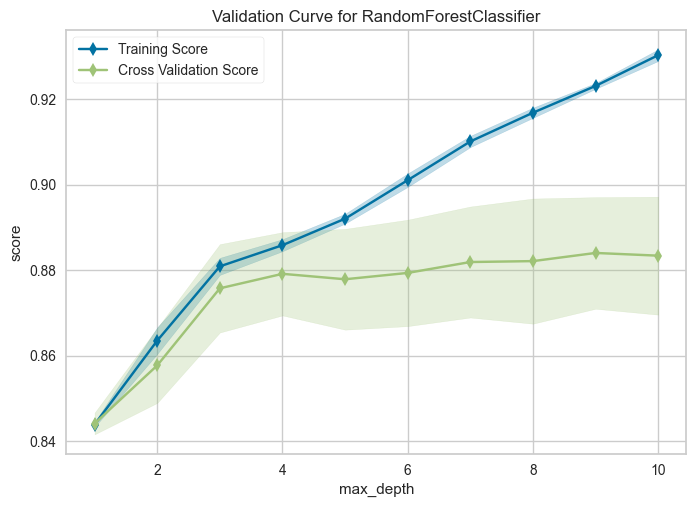

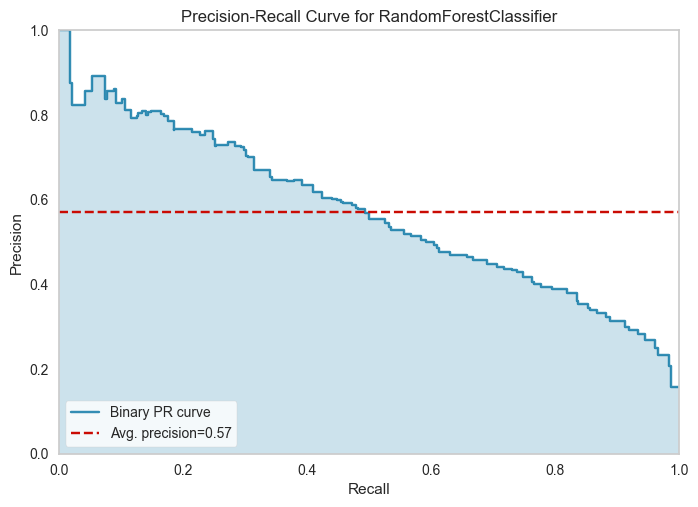

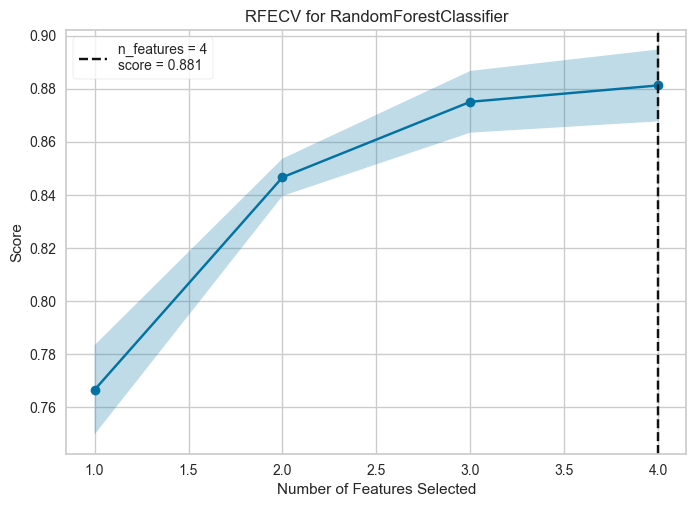

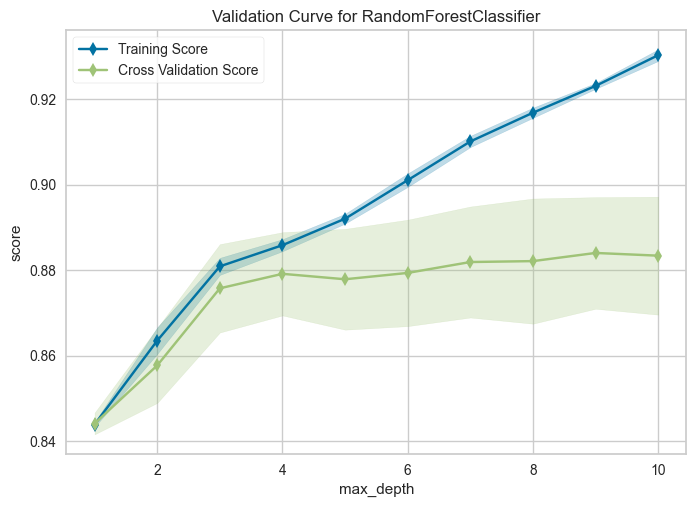

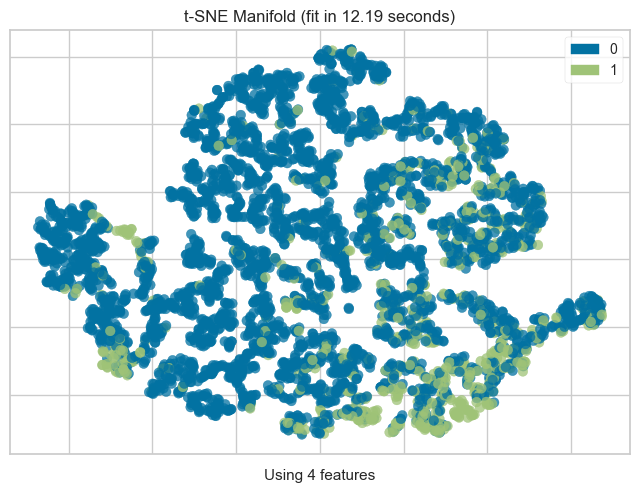

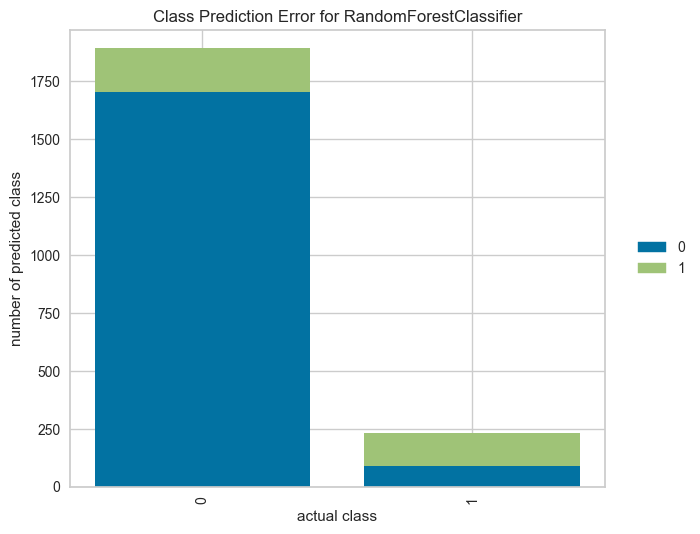

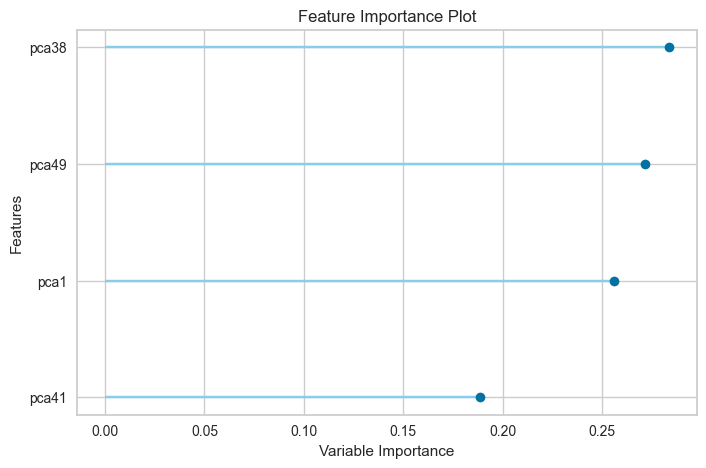

In [59]:
plot_model(model, plot='vc')
plot_model(model, plot='pr')
plot_model(model, plot='rfe')
plot_model(model, plot='vc')
plot_model(model, plot='manifold')
plot_model(model, plot='error')

# Visualizar as features mais importantes
plot_model(model, plot='feature')

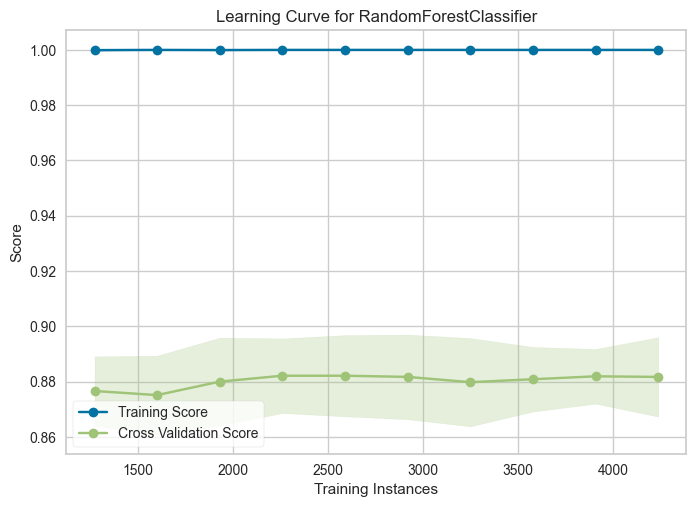

In [45]:
#plot_model(model, plot='learning') 

In [34]:
"""y = DF_ML.default
X = DF_ML.drop(columns='default', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
#print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

# Creazione del modello Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Addestramento del modello
rf.fit(X_train, y_train)

# Previsione sui dati di test
y_pred = rf.predict(X_test)"""

'y = DF_ML.default\nX = DF_ML.drop(columns=\'default\', axis=1)\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)\n#print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")\n\nrus = RandomUnderSampler(random_state=42)\nX_train_res, y_train_res = rus.fit_resample(X_train, y_train)\n\n# Creazione del modello Random Forest\nrf = RandomForestClassifier(n_estimators=100, random_state=42)\n\n# Addestramento del modello\nrf.fit(X_train, y_train)\n\n# Previsione sui dati di test\ny_pred = rf.predict(X_test)'

In [35]:
"""# Avaliação do modelo
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))"""

'# Avaliação do modelo\nprint("Relatório de Classificação:\n", classification_report(y_test, y_pred))\nprint("Confusion Matrix:")\nprint(confusion_matrix(y_test, y_pred))\nprint("\nAccuracy Score:")\nprint(accuracy_score(y_test, y_pred))'